## Import All Libraries

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt

Using TensorFlow backend.


## Data Preparation

### Data ini diambil dari : https://www.kaggle.com/orgesleka/used-cars-database

In [2]:
data = pd.read_csv("D:/Materi Kuliah/Semester 7/data/autos.csv", delimiter=',', encoding='latin-1')

In [3]:
data.shape

(371528, 20)

In [4]:
data.cov()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
price,1.287341e+13,-60734.435803,4.722570e+06,-9.144520e+07,-37645.510015,0.0,-2.928918e+08
yearOfRegistration,-6.073444e+04,8624.204948,6.266929e+00,-2.060668e+05,-4.001597,0.0,-3.958339e+03
powerPS,4.722570e+06,6.266929,3.691762e+04,-8.275619e+04,31.640911,0.0,1.344003e+05
kilometer,-9.144520e+07,-206066.768626,-8.275619e+04,1.609000e+09,273.763143,0.0,-2.762441e+07
monthOfRegistration,-3.764551e+04,-4.001597,3.164091e+01,2.737631e+02,13.782005,0.0,1.433108e+03
nrOfPictures,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00
postalCode,-2.928918e+08,-3958.338593,1.344003e+05,-2.762441e+07,1433.107516,0.0,6.655927e+08


Berikut ini adalah proses cleaning data

In [5]:
data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [6]:
data.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [7]:
data['vehicleType']

0                NaN
1              coupe
2                suv
3         kleinwagen
4         kleinwagen
5          limousine
6             cabrio
7          limousine
8                bus
9         kleinwagen
10         limousine
11             kombi
12             kombi
13             kombi
14               suv
15        kleinwagen
16               NaN
17        kleinwagen
18               bus
19               bus
20             coupe
21         limousine
22               NaN
23        kleinwagen
24         limousine
25             kombi
26               NaN
27         limousine
28               bus
29        kleinwagen
             ...    
371498     limousine
371499    kleinwagen
371500     limousine
371501           bus
371502         kombi
371503    kleinwagen
371504           NaN
371505         kombi
371506     limousine
371507         kombi
371508     limousine
371509           NaN
371510     limousine
371511     limousine
371512     limousine
371513     limousine
371514       

In [8]:
data['vehicleType'] = data['vehicleType'].fillna(data['vehicleType'].mode().iloc[0])

In [9]:
data['vehicleType']

0          limousine
1              coupe
2                suv
3         kleinwagen
4         kleinwagen
5          limousine
6             cabrio
7          limousine
8                bus
9         kleinwagen
10         limousine
11             kombi
12             kombi
13             kombi
14               suv
15        kleinwagen
16         limousine
17        kleinwagen
18               bus
19               bus
20             coupe
21         limousine
22         limousine
23        kleinwagen
24         limousine
25             kombi
26         limousine
27         limousine
28               bus
29        kleinwagen
             ...    
371498     limousine
371499    kleinwagen
371500     limousine
371501           bus
371502         kombi
371503    kleinwagen
371504     limousine
371505         kombi
371506     limousine
371507         kombi
371508     limousine
371509     limousine
371510     limousine
371511     limousine
371512     limousine
371513     limousine
371514       

In [10]:
data['gearbox']

0           manuell
1           manuell
2         automatik
3           manuell
4           manuell
5           manuell
6           manuell
7           manuell
8           manuell
9           manuell
10          manuell
11          manuell
12          manuell
13          manuell
14          manuell
15              NaN
16              NaN
17        automatik
18          manuell
19          manuell
20          manuell
21        automatik
22          manuell
23          manuell
24          manuell
25        automatik
26          manuell
27          manuell
28          manuell
29          manuell
            ...    
371498      manuell
371499      manuell
371500    automatik
371501    automatik
371502      manuell
371503      manuell
371504    automatik
371505      manuell
371506      manuell
371507      manuell
371508      manuell
371509      manuell
371510    automatik
371511      manuell
371512    automatik
371513      manuell
371514      manuell
371515      manuell
371516      manuell


In [11]:
data['gearbox'] = data['gearbox'].fillna(data['gearbox'].mode().iloc[0])

In [12]:
data['gearbox']

0           manuell
1           manuell
2         automatik
3           manuell
4           manuell
5           manuell
6           manuell
7           manuell
8           manuell
9           manuell
10          manuell
11          manuell
12          manuell
13          manuell
14          manuell
15          manuell
16          manuell
17        automatik
18          manuell
19          manuell
20          manuell
21        automatik
22          manuell
23          manuell
24          manuell
25        automatik
26          manuell
27          manuell
28          manuell
29          manuell
            ...    
371498      manuell
371499      manuell
371500    automatik
371501    automatik
371502      manuell
371503      manuell
371504    automatik
371505      manuell
371506      manuell
371507      manuell
371508      manuell
371509      manuell
371510    automatik
371511      manuell
371512    automatik
371513      manuell
371514      manuell
371515      manuell
371516      manuell


In [13]:
data['model']

0                golf
1                 NaN
2               grand
3                golf
4               fabia
5                 3er
6             2_reihe
7              andere
8               c_max
9                golf
10            3_reihe
11             passat
12             passat
13             passat
14             navara
15                 ka
16               polo
17             twingo
18              c_max
19           a_klasse
20           scirocco
21                5er
22             meriva
23              arosa
24             andere
25                5er
26                 c4
27              civic
28        transporter
29              punto
             ...     
371498         vectra
371499          corsa
371500           golf
371501        voyager
371502             a4
371503          justy
371504       c_klasse
371505          astra
371506           golf
371507             a4
371508          astra
371509            NaN
371510       e_klasse
371511             a3
371512    

In [14]:
data['model'] = data['model'].fillna(data['model'].mode().iloc[0])

In [15]:
data['model']

0                golf
1                golf
2               grand
3                golf
4               fabia
5                 3er
6             2_reihe
7              andere
8               c_max
9                golf
10            3_reihe
11             passat
12             passat
13             passat
14             navara
15                 ka
16               polo
17             twingo
18              c_max
19           a_klasse
20           scirocco
21                5er
22             meriva
23              arosa
24             andere
25                5er
26                 c4
27              civic
28        transporter
29              punto
             ...     
371498         vectra
371499          corsa
371500           golf
371501        voyager
371502             a4
371503          justy
371504       c_klasse
371505          astra
371506           golf
371507             a4
371508          astra
371509           golf
371510       e_klasse
371511             a3
371512    

In [16]:
data['fuelType']

0         benzin
1         diesel
2         diesel
3         benzin
4         diesel
5         benzin
6         benzin
7         benzin
8         benzin
9            NaN
10        benzin
11        diesel
12        benzin
13           NaN
14        diesel
15        benzin
16        benzin
17        benzin
18        diesel
19        benzin
20        benzin
21        benzin
22        benzin
23        benzin
24        benzin
25        diesel
26           NaN
27        benzin
28        benzin
29        benzin
           ...  
371498    benzin
371499    benzin
371500    benzin
371501    benzin
371502    benzin
371503    benzin
371504       NaN
371505    benzin
371506    diesel
371507    diesel
371508    benzin
371509       NaN
371510    diesel
371511    benzin
371512    diesel
371513    diesel
371514    benzin
371515    benzin
371516    benzin
371517    diesel
371518    diesel
371519       NaN
371520    benzin
371521    benzin
371522    benzin
371523       NaN
371524    benzin
371525    dies

In [17]:
data['fuelType'] = data['fuelType'].fillna(data['fuelType'].mode().iloc[0])

In [18]:
data['fuelType']

0         benzin
1         diesel
2         diesel
3         benzin
4         diesel
5         benzin
6         benzin
7         benzin
8         benzin
9         benzin
10        benzin
11        diesel
12        benzin
13        benzin
14        diesel
15        benzin
16        benzin
17        benzin
18        diesel
19        benzin
20        benzin
21        benzin
22        benzin
23        benzin
24        benzin
25        diesel
26        benzin
27        benzin
28        benzin
29        benzin
           ...  
371498    benzin
371499    benzin
371500    benzin
371501    benzin
371502    benzin
371503    benzin
371504    benzin
371505    benzin
371506    diesel
371507    diesel
371508    benzin
371509    benzin
371510    diesel
371511    benzin
371512    diesel
371513    diesel
371514    benzin
371515    benzin
371516    benzin
371517    diesel
371518    diesel
371519    benzin
371520    benzin
371521    benzin
371522    benzin
371523    benzin
371524    benzin
371525    dies

In [19]:
data['notRepairedDamage']

0          NaN
1           ja
2          NaN
3         nein
4         nein
5           ja
6         nein
7         nein
8          NaN
9          NaN
10        nein
11          ja
12         NaN
13        nein
14        nein
15         NaN
16         NaN
17        nein
18        nein
19        nein
20        nein
21        nein
22        nein
23        nein
24          ja
25          ja
26        nein
27        nein
28        nein
29        nein
          ... 
371498     NaN
371499    nein
371500    nein
371501    nein
371502    nein
371503    nein
371504     NaN
371505      ja
371506    nein
371507     NaN
371508    nein
371509    nein
371510    nein
371511    nein
371512      ja
371513    nein
371514     NaN
371515     NaN
371516    nein
371517    nein
371518    nein
371519    nein
371520      ja
371521    nein
371522      ja
371523     NaN
371524    nein
371525    nein
371526     NaN
371527    nein
Name: notRepairedDamage, Length: 371528, dtype: object

In [20]:
data['notRepairedDamage'] = data['notRepairedDamage'].fillna(data['notRepairedDamage'].mode().iloc[0])

In [21]:
data['notRepairedDamage']

0         nein
1           ja
2         nein
3         nein
4         nein
5           ja
6         nein
7         nein
8         nein
9         nein
10        nein
11          ja
12        nein
13        nein
14        nein
15        nein
16        nein
17        nein
18        nein
19        nein
20        nein
21        nein
22        nein
23        nein
24          ja
25          ja
26        nein
27        nein
28        nein
29        nein
          ... 
371498    nein
371499    nein
371500    nein
371501    nein
371502    nein
371503    nein
371504    nein
371505      ja
371506    nein
371507    nein
371508    nein
371509    nein
371510    nein
371511    nein
371512      ja
371513    nein
371514    nein
371515    nein
371516    nein
371517    nein
371518    nein
371519    nein
371520      ja
371521    nein
371522      ja
371523    nein
371524    nein
371525    nein
371526    nein
371527    nein
Name: notRepairedDamage, Length: 371528, dtype: object

In [22]:
data.shape

(371528, 20)

Kita akan mencek nilai harga yang dibawah $1000 dan kemudian menghapusnya dari data

In [23]:
limit_price = []
for i, j in enumerate(data['price']):
    if j<1000:
        print(i)
        limit_price.append(j)

0
5
7
9
12
15
16
23
24
29
31
32
35
40
45
55
60
61
71
73
78
81
82
83
84
91
94
103
106
107
108
111
114
115
119
123
133
143
146
150
152
153
157
159
163
165
167
169
171
173
182
197
211
217
220
222
226
231
232
237
244
245
249
254
255
258
261
263
264
268
273
279
280
292
293
304
305
315
318
321
335
338
345
346
359
360
362
368
369
370
373
398
403
409
413
414
415
422
430
432
434
436
447
460
464
468
484
489
490
492
498
503
506
507
517
521
524
534
535
536
543
545
549
565
567
573
577
582
588
592
594
604
607
615
619
620
621
627
630
633
642
649
651
653
692
693
694
696
697
699
702
705
712
715
719
734
736
737
743
751
758
763
764
766
782
787
792
793
799
805
806
807
813
815
816
823
824
834
838
845
849
863
865
871
877
880
884
885
889
896
897
900
902
905
907
917
918
927
930
934
941
943
947
959
966
979
985
988
991
992
994
1005
1007
1008
1010
1011
1013
1028
1030
1031
1037
1039
1046
1047
1050
1055
1056
1058
1060
1062
1064
1070
1078
1079
1080
1088
1093
1099
1102
1109
1114
1115
1124
1125
1135
1138
1142
1144
11

16962
16963
16964
16991
16996
17000
17005
17010
17020
17022
17025
17028
17035
17037
17050
17056
17057
17058
17059
17064
17066
17073
17076
17086
17090
17095
17102
17106
17121
17123
17126
17129
17130
17137
17138
17140
17146
17153
17155
17163
17164
17171
17174
17179
17181
17186
17187
17192
17195
17196
17207
17210
17212
17224
17226
17228
17238
17242
17253
17256
17271
17277
17283
17287
17288
17292
17294
17296
17298
17304
17310
17315
17328
17340
17342
17344
17352
17353
17357
17365
17368
17371
17372
17373
17379
17380
17386
17406
17407
17410
17411
17412
17413
17420
17426
17431
17447
17448
17452
17453
17463
17471
17475
17480
17482
17485
17492
17494
17495
17496
17503
17505
17507
17510
17516
17518
17523
17530
17552
17553
17558
17561
17571
17573
17593
17598
17605
17621
17625
17631
17632
17636
17642
17649
17669
17679
17680
17693
17699
17710
17712
17713
17723
17731
17732
17733
17739
17745
17747
17751
17763
17764
17766
17767
17772
17775
17780
17783
17784
17798
17800
17802
17803
17808
17810
17815
1782

35017
35019
35028
35034
35037
35038
35040
35041
35042
35046
35048
35054
35056
35057
35060
35090
35095
35103
35106
35112
35126
35127
35128
35129
35134
35141
35144
35154
35158
35161
35162
35168
35173
35174
35184
35186
35187
35191
35196
35204
35205
35211
35212
35214
35215
35219
35224
35228
35229
35236
35242
35249
35257
35265
35266
35269
35281
35282
35283
35286
35291
35300
35303
35304
35317
35318
35321
35325
35326
35328
35330
35335
35337
35338
35340
35346
35347
35352
35353
35363
35382
35386
35388
35395
35399
35404
35405
35407
35414
35424
35427
35439
35440
35441
35442
35454
35455
35471
35477
35482
35486
35495
35499
35503
35509
35510
35517
35523
35524
35526
35532
35533
35534
35537
35538
35541
35549
35553
35556
35560
35564
35567
35576
35577
35578
35581
35587
35594
35598
35599
35604
35605
35606
35620
35624
35627
35628
35630
35635
35638
35640
35641
35642
35644
35651
35652
35653
35654
35656
35657
35659
35662
35664
35678
35680
35681
35684
35685
35687
35689
35695
35700
35702
35704
35705
35709
3571

52683
52687
52688
52692
52696
52698
52699
52705
52718
52720
52735
52753
52755
52759
52762
52766
52770
52774
52777
52788
52789
52793
52794
52799
52804
52805
52816
52821
52824
52829
52835
52839
52842
52844
52846
52850
52852
52853
52862
52875
52884
52886
52892
52900
52919
52931
52935
52939
52940
52947
52950
52951
52956
52957
52958
52965
52976
52979
52982
52991
52993
52995
52999
53001
53003
53006
53008
53009
53011
53013
53016
53021
53026
53030
53034
53036
53038
53040
53043
53051
53056
53057
53062
53065
53069
53071
53073
53078
53104
53106
53111
53112
53117
53127
53129
53134
53135
53137
53148
53152
53154
53157
53170
53178
53179
53183
53189
53196
53201
53207
53209
53213
53214
53215
53221
53222
53231
53242
53251
53261
53265
53268
53276
53277
53278
53283
53287
53299
53302
53303
53313
53322
53323
53325
53329
53332
53334
53335
53338
53346
53347
53350
53355
53365
53373
53383
53385
53393
53396
53399
53403
53404
53416
53426
53429
53434
53447
53453
53459
53462
53467
53471
53474
53476
53477
53479
5348

70764
70771
70775
70783
70789
70790
70799
70800
70804
70805
70812
70814
70823
70828
70830
70833
70835
70836
70842
70848
70851
70853
70857
70864
70867
70873
70876
70891
70894
70895
70900
70932
70938
70944
70951
70967
70984
70988
70991
70999
71003
71005
71009
71023
71025
71029
71038
71043
71051
71061
71065
71071
71075
71077
71081
71085
71087
71088
71092
71099
71104
71107
71109
71112
71114
71120
71122
71125
71129
71130
71137
71139
71144
71149
71153
71156
71159
71167
71171
71174
71175
71182
71188
71190
71193
71194
71195
71201
71205
71217
71218
71231
71239
71240
71246
71248
71261
71265
71268
71275
71278
71283
71284
71291
71294
71310
71316
71321
71336
71343
71352
71353
71366
71373
71385
71389
71394
71395
71407
71408
71410
71413
71415
71416
71419
71422
71444
71445
71452
71460
71469
71471
71472
71474
71476
71487
71488
71490
71493
71499
71504
71507
71510
71522
71526
71527
71528
71545
71556
71559
71562
71583
71595
71597
71601
71603
71617
71621
71622
71638
71642
71647
71650
71652
71656
71663
7166

90707
90713
90717
90718
90728
90729
90730
90734
90741
90745
90751
90766
90768
90772
90773
90776
90783
90784
90786
90788
90791
90793
90795
90800
90803
90829
90838
90842
90844
90846
90849
90850
90851
90854
90860
90864
90868
90876
90878
90879
90883
90884
90889
90903
90904
90909
90934
90936
90937
90938
90943
90948
90950
90954
90957
90960
90965
90974
90975
90978
90980
90981
90993
91001
91003
91004
91010
91012
91016
91018
91022
91032
91033
91035
91039
91042
91043
91045
91060
91063
91075
91084
91093
91094
91101
91102
91107
91115
91116
91118
91119
91120
91126
91133
91142
91145
91148
91150
91154
91160
91163
91164
91170
91173
91180
91182
91183
91187
91189
91190
91201
91205
91206
91207
91217
91227
91228
91241
91245
91252
91257
91259
91260
91264
91269
91270
91285
91286
91287
91294
91301
91305
91306
91317
91318
91325
91326
91335
91338
91339
91342
91343
91346
91347
91351
91356
91363
91370
91375
91378
91383
91390
91391
91393
91396
91397
91399
91400
91402
91404
91407
91408
91414
91415
91420
91424
9142

108454
108458
108459
108464
108465
108477
108479
108482
108483
108484
108493
108499
108505
108515
108518
108523
108531
108532
108534
108537
108539
108540
108544
108545
108551
108552
108555
108562
108563
108574
108577
108581
108585
108586
108587
108592
108597
108604
108605
108611
108619
108624
108629
108634
108635
108637
108641
108645
108649
108673
108674
108675
108678
108684
108685
108687
108696
108706
108708
108710
108715
108720
108728
108734
108740
108742
108750
108751
108754
108755
108757
108775
108776
108777
108779
108780
108781
108790
108791
108795
108802
108814
108821
108824
108832
108836
108841
108844
108845
108848
108849
108850
108852
108855
108870
108871
108877
108878
108879
108881
108882
108888
108895
108896
108897
108903
108909
108911
108912
108921
108923
108924
108927
108930
108935
108940
108951
108953
108955
108956
108962
108967
108968
108972
108974
108981
108991
108996
108998
109002
109006
109007
109010
109013
109015
109019
109031
109038
109047
109049
109051
109052
109055

128277
128281
128293
128296
128297
128300
128306
128311
128313
128315
128317
128319
128325
128330
128334
128341
128347
128351
128354
128356
128359
128376
128381
128384
128392
128394
128399
128400
128402
128406
128414
128417
128420
128428
128430
128432
128433
128435
128436
128437
128439
128443
128446
128449
128450
128453
128454
128458
128459
128460
128461
128463
128465
128473
128476
128478
128488
128491
128497
128502
128505
128514
128516
128521
128526
128527
128534
128535
128537
128543
128548
128552
128557
128560
128568
128577
128581
128582
128591
128593
128595
128597
128606
128607
128609
128618
128620
128626
128627
128628
128632
128633
128634
128637
128640
128645
128649
128660
128665
128666
128667
128675
128676
128680
128682
128683
128686
128703
128711
128713
128718
128720
128721
128723
128728
128735
128737
128740
128743
128754
128760
128767
128770
128775
128782
128785
128788
128792
128796
128800
128813
128815
128818
128819
128823
128830
128838
128842
128849
128853
128857
128859
128862

146403
146407
146415
146417
146429
146435
146447
146456
146458
146462
146464
146471
146474
146476
146479
146485
146488
146490
146492
146501
146502
146506
146517
146518
146520
146526
146532
146544
146545
146548
146555
146556
146558
146561
146565
146569
146570
146572
146576
146577
146584
146587
146588
146589
146590
146591
146592
146593
146595
146596
146598
146601
146605
146606
146607
146609
146610
146611
146612
146617
146619
146625
146627
146628
146631
146633
146637
146643
146644
146648
146653
146655
146656
146658
146663
146664
146673
146675
146678
146688
146711
146712
146723
146724
146726
146729
146731
146734
146736
146738
146741
146750
146753
146758
146773
146779
146783
146787
146788
146791
146792
146799
146801
146804
146806
146807
146808
146813
146819
146826
146832
146843
146844
146849
146850
146851
146852
146854
146856
146858
146875
146879
146880
146881
146884
146886
146888
146894
146895
146898
146903
146907
146909
146915
146917
146921
146924
146928
146940
146941
146946
146951
146956

164070
164071
164073
164075
164076
164078
164091
164096
164103
164108
164109
164111
164118
164119
164120
164129
164132
164143
164150
164155
164157
164164
164173
164195
164199
164211
164217
164224
164232
164236
164242
164243
164244
164245
164249
164255
164261
164264
164273
164274
164277
164279
164288
164294
164297
164300
164305
164309
164311
164321
164338
164341
164348
164364
164367
164375
164380
164382
164384
164389
164391
164399
164401
164402
164403
164407
164408
164413
164416
164417
164419
164421
164423
164426
164431
164441
164443
164446
164454
164455
164457
164459
164461
164472
164473
164480
164481
164484
164486
164489
164490
164495
164497
164498
164500
164502
164505
164506
164513
164518
164519
164523
164525
164533
164534
164536
164537
164551
164552
164553
164554
164555
164556
164560
164569
164570
164572
164580
164586
164588
164593
164596
164597
164603
164604
164605
164608
164620
164622
164627
164631
164637
164639
164651
164664
164665
164670
164673
164677
164678
164679
164692
164693

183996
183998
184004
184007
184013
184015
184019
184024
184028
184030
184031
184033
184036
184043
184054
184055
184056
184057
184061
184064
184068
184071
184072
184073
184079
184086
184087
184089
184095
184099
184104
184115
184119
184122
184129
184139
184143
184145
184148
184149
184159
184164
184167
184168
184174
184177
184179
184180
184185
184186
184190
184201
184203
184214
184220
184221
184226
184228
184229
184232
184233
184234
184240
184247
184248
184266
184282
184284
184285
184289
184290
184293
184294
184295
184301
184304
184305
184314
184318
184321
184325
184330
184335
184359
184363
184364
184373
184374
184379
184382
184386
184390
184396
184402
184405
184411
184418
184419
184420
184425
184431
184432
184444
184445
184448
184450
184456
184459
184463
184464
184466
184468
184472
184475
184478
184479
184494
184502
184503
184504
184509
184511
184515
184520
184523
184533
184538
184544
184547
184551
184554
184555
184568
184570
184573
184583
184585
184589
184594
184600
184601
184603
184605

201897
201905
201906
201907
201911
201916
201917
201919
201924
201925
201926
201928
201933
201942
201943
201944
201948
201952
201959
201961
201967
201975
201976
201981
201984
201987
201989
201991
202001
202010
202017
202029
202034
202038
202041
202042
202045
202047
202053
202058
202062
202063
202066
202067
202068
202070
202083
202091
202096
202099
202102
202104
202107
202114
202115
202117
202118
202122
202126
202127
202143
202145
202148
202150
202153
202157
202162
202167
202169
202171
202175
202178
202180
202183
202188
202189
202190
202205
202207
202212
202213
202218
202221
202224
202225
202227
202228
202229
202231
202236
202238
202240
202242
202243
202245
202248
202249
202251
202257
202265
202272
202283
202284
202288
202290
202291
202297
202299
202301
202302
202305
202316
202329
202330
202347
202351
202354
202355
202356
202371
202383
202392
202394
202396
202398
202400
202401
202405
202411
202417
202420
202425
202435
202438
202442
202443
202446
202453
202476
202481
202490
202496
202502

221057
221062
221080
221091
221094
221095
221097
221099
221101
221106
221111
221112
221120
221122
221126
221134
221136
221152
221159
221160
221165
221167
221169
221170
221175
221178
221180
221189
221193
221196
221206
221210
221212
221216
221217
221222
221228
221230
221232
221235
221239
221242
221248
221253
221257
221268
221275
221281
221282
221283
221287
221288
221291
221295
221296
221300
221309
221315
221317
221320
221329
221332
221333
221338
221339
221345
221349
221360
221362
221367
221370
221376
221380
221385
221391
221392
221395
221403
221404
221406
221416
221418
221437
221439
221446
221456
221460
221466
221469
221475
221477
221484
221490
221493
221495
221496
221504
221507
221512
221516
221518
221531
221540
221543
221575
221582
221585
221586
221588
221593
221595
221599
221600
221602
221607
221609
221614
221616
221625
221628
221634
221636
221638
221644
221645
221654
221655
221657
221660
221661
221663
221665
221683
221701
221706
221710
221712
221716
221717
221718
221721
221723
221735

239116
239123
239124
239129
239132
239135
239136
239138
239145
239147
239166
239167
239171
239183
239184
239186
239187
239190
239199
239202
239208
239216
239220
239225
239233
239237
239239
239252
239255
239256
239259
239262
239266
239269
239270
239276
239278
239284
239286
239290
239295
239303
239304
239305
239308
239311
239312
239316
239320
239321
239324
239328
239331
239332
239333
239337
239338
239340
239341
239353
239355
239363
239364
239366
239367
239380
239383
239384
239386
239388
239389
239390
239398
239401
239403
239415
239426
239430
239431
239437
239455
239461
239464
239465
239468
239471
239472
239480
239484
239494
239499
239500
239503
239506
239508
239510
239511
239513
239515
239529
239542
239544
239553
239554
239556
239557
239567
239569
239573
239581
239584
239589
239590
239592
239603
239611
239614
239621
239623
239629
239630
239634
239646
239647
239651
239662
239670
239680
239683
239690
239697
239698
239704
239707
239712
239718
239720
239725
239736
239741
239742
239743
239746

257249
257255
257257
257260
257264
257282
257286
257289
257291
257307
257311
257312
257313
257318
257319
257323
257334
257336
257338
257344
257345
257348
257356
257361
257364
257368
257370
257371
257382
257385
257390
257391
257392
257394
257414
257416
257418
257421
257422
257435
257438
257439
257442
257444
257445
257448
257450
257452
257469
257470
257473
257477
257491
257501
257504
257505
257513
257514
257517
257519
257524
257530
257537
257539
257546
257547
257549
257550
257559
257560
257561
257564
257570
257580
257583
257585
257586
257587
257593
257594
257595
257603
257604
257613
257614
257618
257620
257626
257631
257632
257644
257646
257647
257651
257657
257662
257667
257668
257672
257676
257680
257684
257689
257691
257710
257712
257717
257724
257727
257728
257732
257737
257747
257750
257756
257762
257771
257772
257776
257778
257787
257788
257790
257794
257806
257808
257816
257817
257819
257820
257824
257827
257828
257832
257834
257835
257836
257838
257839
257844
257856
257858
257862

277100
277105
277106
277107
277111
277118
277121
277122
277124
277126
277129
277132
277134
277137
277140
277142
277144
277148
277151
277157
277158
277162
277163
277166
277171
277173
277183
277185
277189
277195
277198
277203
277204
277214
277215
277221
277227
277228
277232
277233
277239
277241
277245
277248
277254
277256
277257
277264
277267
277269
277273
277288
277292
277294
277297
277301
277302
277309
277311
277313
277314
277323
277331
277340
277341
277358
277366
277370
277395
277400
277410
277412
277415
277425
277429
277431
277432
277436
277437
277443
277447
277449
277451
277456
277459
277460
277465
277469
277470
277473
277475
277476
277477
277479
277483
277486
277496
277507
277511
277512
277520
277521
277522
277524
277527
277532
277533
277542
277552
277560
277565
277567
277569
277570
277593
277598
277602
277605
277606
277610
277611
277614
277615
277616
277617
277619
277625
277631
277636
277637
277643
277660
277668
277672
277684
277693
277695
277696
277698
277703
277713
277714
277716

295310
295311
295312
295316
295320
295322
295329
295332
295336
295341
295343
295354
295355
295356
295357
295358
295366
295367
295370
295386
295387
295389
295400
295405
295408
295410
295417
295418
295419
295426
295433
295436
295440
295444
295448
295449
295456
295457
295461
295463
295466
295467
295469
295473
295474
295483
295486
295489
295490
295493
295495
295496
295497
295513
295516
295531
295533
295535
295536
295545
295549
295558
295559
295561
295562
295568
295569
295570
295573
295588
295589
295601
295605
295608
295612
295616
295629
295630
295635
295639
295641
295649
295652
295657
295665
295667
295670
295678
295680
295685
295688
295694
295697
295698
295699
295703
295718
295719
295725
295727
295735
295736
295740
295741
295743
295749
295756
295760
295761
295763
295769
295772
295773
295777
295781
295782
295785
295791
295792
295800
295809
295817
295821
295822
295825
295826
295835
295837
295841
295842
295850
295852
295854
295860
295874
295875
295880
295884
295892
295902
295903
295904
295908

313224
313225
313230
313231
313235
313236
313239
313249
313252
313258
313259
313264
313268
313271
313276
313280
313281
313282
313286
313290
313291
313294
313295
313299
313309
313310
313311
313317
313318
313327
313333
313335
313345
313347
313348
313353
313354
313359
313361
313373
313378
313380
313382
313384
313393
313397
313400
313402
313403
313404
313405
313407
313414
313419
313425
313431
313441
313444
313447
313458
313459
313460
313461
313462
313476
313482
313483
313486
313493
313497
313498
313499
313504
313508
313511
313513
313516
313519
313524
313530
313544
313547
313548
313552
313556
313560
313568
313571
313572
313578
313585
313593
313603
313607
313614
313620
313621
313627
313629
313633
313635
313641
313644
313652
313657
313660
313665
313668
313672
313676
313698
313702
313707
313709
313712
313714
313716
313720
313727
313730
313733
313737
313740
313742
313743
313747
313749
313751
313756
313757
313758
313760
313764
313781
313784
313788
313790
313792
313793
313801
313802
313803
313804

333322
333327
333332
333333
333337
333338
333340
333342
333344
333352
333357
333363
333367
333370
333375
333376
333378
333387
333391
333393
333394
333398
333401
333407
333408
333411
333418
333422
333424
333429
333434
333442
333445
333455
333458
333479
333497
333500
333502
333505
333507
333511
333526
333528
333529
333530
333533
333541
333545
333547
333548
333552
333560
333571
333577
333581
333588
333589
333593
333595
333598
333602
333605
333615
333622
333624
333628
333633
333637
333640
333642
333645
333647
333648
333649
333656
333664
333667
333671
333680
333682
333684
333689
333692
333695
333701
333706
333707
333708
333709
333719
333720
333729
333734
333741
333743
333744
333751
333752
333755
333759
333764
333771
333783
333789
333795
333798
333801
333808
333816
333820
333824
333842
333843
333845
333848
333860
333865
333869
333871
333874
333881
333887
333901
333902
333906
333907
333908
333917
333922
333924
333925
333926
333928
333929
333931
333939
333942
333943
333945
333950
333959
333965

353239
353241
353242
353244
353246
353249
353269
353274
353276
353285
353292
353295
353300
353304
353311
353312
353318
353320
353322
353324
353325
353331
353332
353341
353342
353345
353351
353364
353365
353371
353373
353375
353378
353380
353381
353382
353386
353390
353391
353402
353407
353417
353422
353426
353427
353430
353433
353436
353439
353440
353441
353444
353457
353464
353471
353473
353475
353480
353487
353488
353497
353501
353504
353505
353516
353524
353525
353529
353533
353539
353540
353544
353549
353550
353551
353552
353554
353561
353562
353568
353571
353574
353578
353583
353587
353590
353592
353593
353594
353601
353605
353610
353611
353612
353618
353633
353634
353642
353654
353657
353659
353661
353665
353667
353670
353676
353680
353685
353690
353693
353694
353697
353698
353702
353706
353711
353713
353714
353723
353724
353726
353727
353740
353743
353748
353750
353760
353768
353769
353771
353772
353776
353781
353782
353784
353788
353791
353795
353797
353809
353812
353820
353832

371452
371459
371463
371464
371473
371486
371492
371495
371498
371499
371505
371514
371522


In [24]:
print("Jumlah banyak data dengan harga mobil yg dibawah $1000= {0}".format(len(limit_price)))

Jumlah banyak data dengan harga mobil yg dibawah $1000= 83335


In [25]:
for i, j in enumerate(data['price']):
    if j<1000:
        data = data.drop(i)

In [26]:
data.shape

(288193, 20)

Lalu, kita akan membuat kolom baru untuk durasi waktu pembelian (jam) dengan menggunakan selisih dari waktu di atribut 'dateCreated' dan 'lastSeen'

In [31]:
a = []
b = []
c = []

for i in data['lastSeen']:
    a.append(pd.to_datetime(i))

for j in data['dateCreated']:
    b.append(pd.to_datetime(j))
    
for k in range(0, 288193):
    c.append((a[k] - b[k]).total_seconds()/3600)

data['duration_hours'] = c

In [32]:
data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,duration_hours
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,337.780556
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,540.796111
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,17.671389
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,154.289167
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,114.310833
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,...,30000,8,benzin,ford,nein,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13,23.703611
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,...,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34,274.759444
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,...,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17,10.421389
13,2016-03-21 21:37:40,VW_PASSAT_1.9_TDI_131_PS_LEDER,privat,Angebot,2500,control,kombi,2004,manuell,131,...,150000,2,benzin,volkswagen,nein,2016-03-21 00:00:00,0,90762,2016-03-23 02:50:54,50.848333
14,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,privat,Angebot,17999,control,suv,2011,manuell,190,...,70000,3,diesel,nissan,nein,2016-03-21 00:00:00,0,4177,2016-04-06 07:45:42,391.761667


Kemudian kita akan mencek index data duplicated dan menghapusnya

In [33]:
check = data.duplicated()

for i, j in enumerate(check):
    if (j == True):
        print(i, j)

139164 True
187970 True
209826 True
264831 True


In [34]:
data.drop_duplicates(keep=False,inplace=True)

In [35]:
data.duplicated().sum()

0

Data yg sudah bersih disimpan menjadi data baru

In [4]:
data.to_csv("auto_fix.csv")

In [5]:
car = pd.read_csv('./auto_fix.csv')
car

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,duration_hours
0,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,337.780556
1,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,125000,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,540.796111
2,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,17.671389
3,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,154.289167
4,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,...,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,114.310833
5,8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,...,30000,8,benzin,ford,nein,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13,23.703611
6,10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,...,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34,274.759444
7,11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,...,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17,10.421389
8,13,2016-03-21 21:37:40,VW_PASSAT_1.9_TDI_131_PS_LEDER,privat,Angebot,2500,control,kombi,2004,manuell,...,150000,2,benzin,volkswagen,nein,2016-03-21 00:00:00,0,90762,2016-03-23 02:50:54,50.848333
9,14,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,privat,Angebot,17999,control,suv,2011,manuell,...,70000,3,diesel,nissan,nein,2016-03-21 00:00:00,0,4177,2016-04-06 07:45:42,391.761667


In [6]:
del car['Unnamed: 0']

## Modeling 

Kita inisialisasi variabel yang memiliki tipe data float dan integer, kemudian menampilkan grafik scatter plot untuk melihat distribusi data

In [7]:
car.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                    int64
abtest                  object
vehicleType             object
yearOfRegistration       int64
gearbox                 object
powerPS                  int64
model                   object
kilometer                int64
monthOfRegistration      int64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures             int64
postalCode               int64
lastSeen                object
duration_hours         float64
dtype: object

In [8]:
numerical_vars = ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures', 'postalCode', 'duration_hours']

<Figure size 720x504 with 0 Axes>

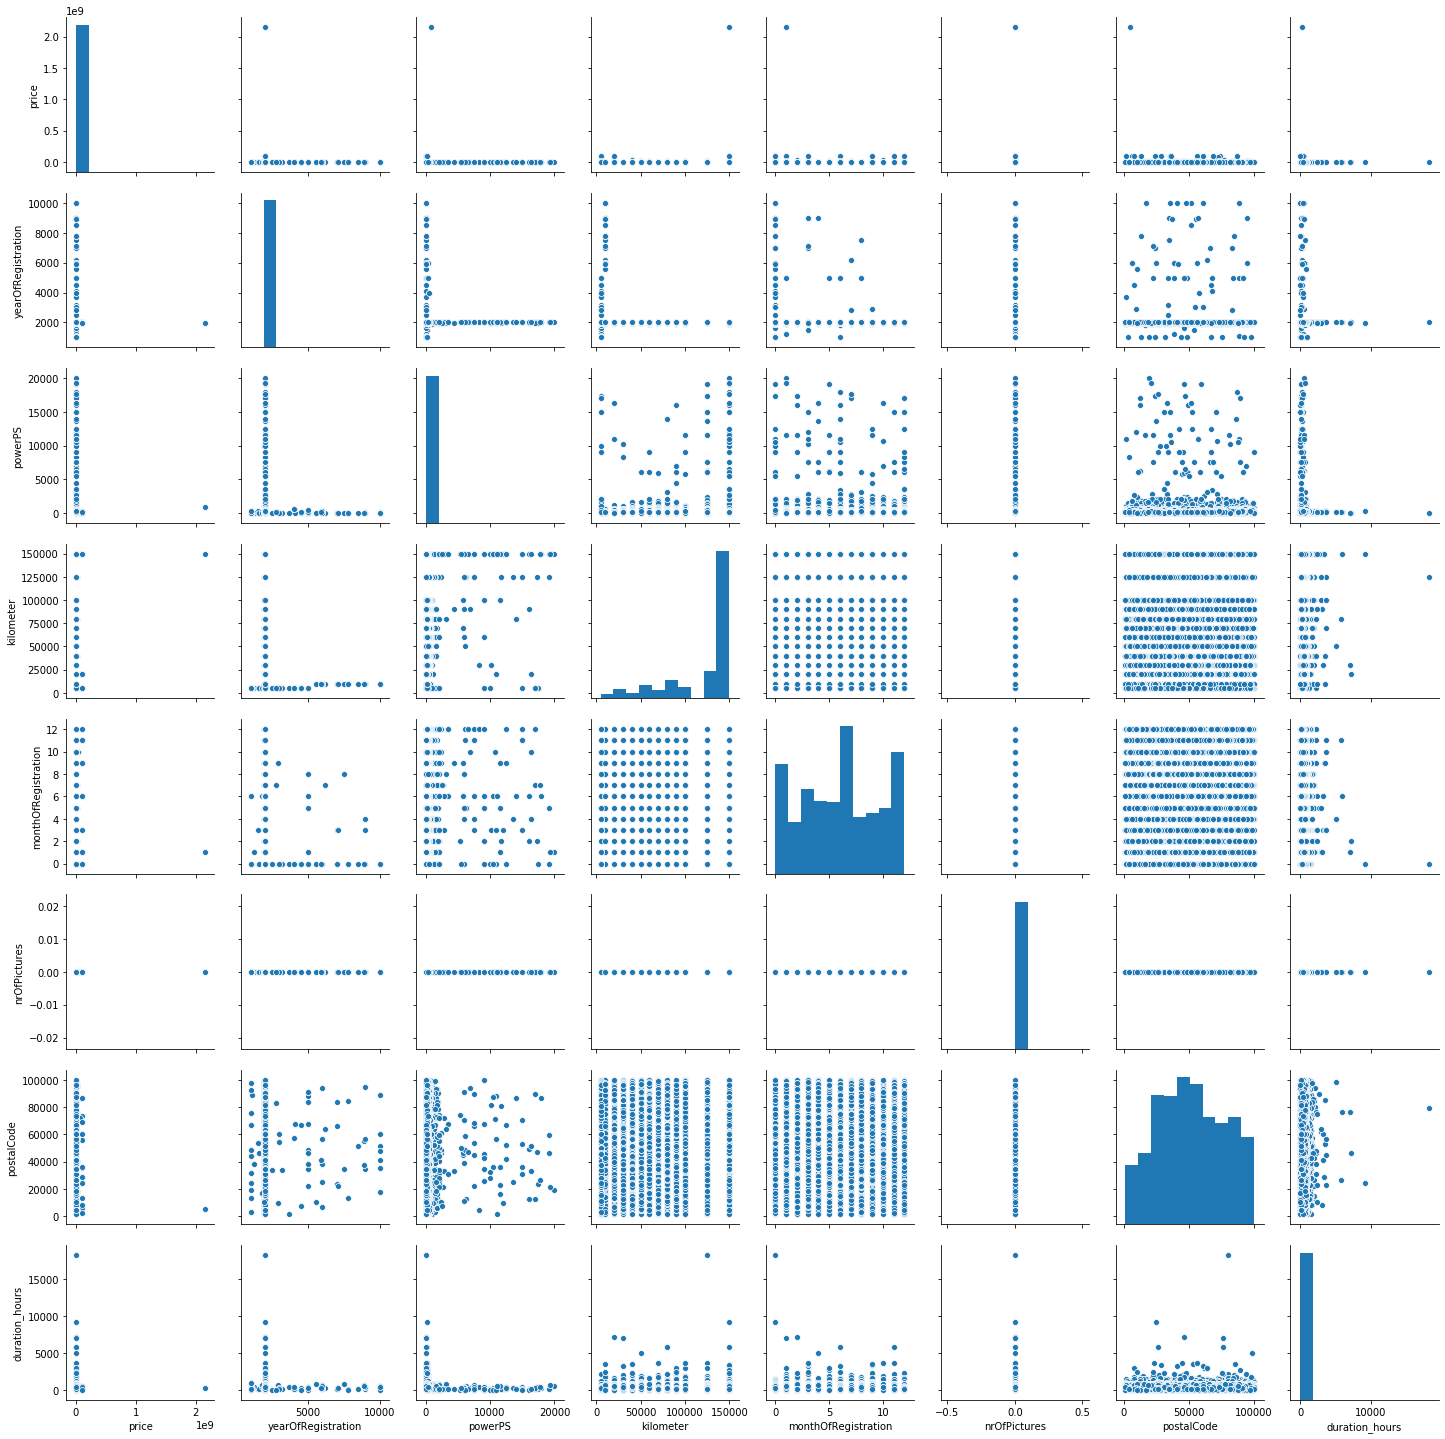

In [41]:
plt.figure(figsize=(10, 7))
_ = sns.pairplot(data=data[numerical_vars], kind='scatter')
plt.show()

Sebelum membuat model, kita akan membagi data menjadi data train dan data test, dimana data train sebanyak 80% dan data test 20% dari jumlah data.

In [114]:
train, test = train_test_split(car, test_size = 0.2, random_state = 0)

In [115]:
print("Jumlah data: {0}".format(car.shape))
print("Jumlah data train: {0}".format(train.shape))
print("Jumlah data test: {0}".format(test.shape))

Jumlah data: (288185, 21)
Jumlah data train: (230548, 21)
Jumlah data test: (57637, 21)


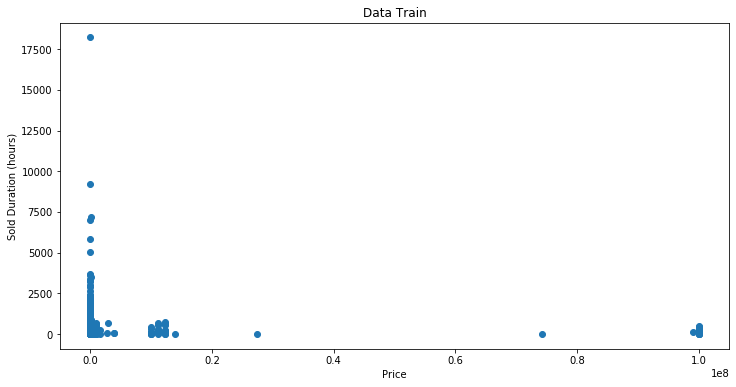

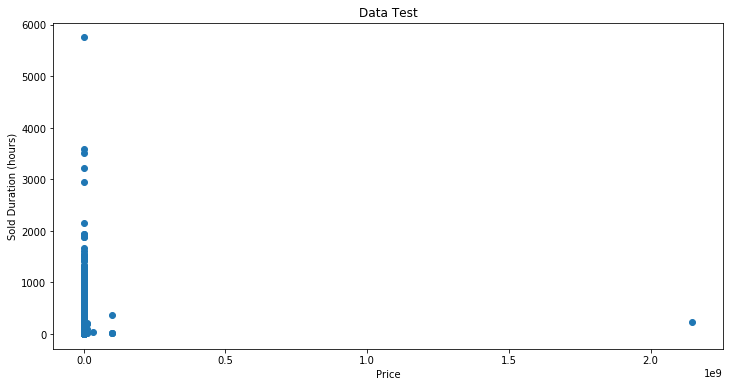

In [12]:
car_train = train[["price", "duration_hours"]]
car_test = test[["price", "duration_hours"]]

#Visualise data points
plt.figure(figsize=(12,6))
plt.title("Data Train")
plt.scatter(car_train["price"], car_train["duration_hours"])
plt.xlabel('Price')
plt.ylabel('Sold Duration (hours)')
plt.show()

plt.figure(figsize=(12,6))
plt.title("Data Test")
plt.scatter(car_test["price"], car_test["duration_hours"])
plt.xlabel('Price')
plt.ylabel('Sold Duration (hours)')
plt.show()

Pertama, kita menjadikan atribut 'name' sebagai index. Ini akan membantu dalam pembuatan label pada dendrogramnya. Kemudian kita memilih 50 data teratas dari data train-nya. 

In [13]:
train = train.set_index('name')

In [28]:
X_train = train.iloc[:200, [3, 19]]
X_train

,price,duration_hours
name,,
Audi_A3_1.6_Ambition,1800,466.296389
opel_corsa__gut_gepflegt_motor_ecotec_1.0,1200,11.911389
"Opel_Meriva_1.7_CDTI_Automatik_Innovation/18""/Navi",10000,431.780278
320_d_~_M_PAKET_II,3000,16.106389
Renault_Kangoo_1.2_Authentique,1600,109.747500
Vivaro_1_6_D__115PS__EZ:_8/15__14.500km__Gar.bis_8/17__AHK_2_To._,23399,416.277778
Audi_A4___B5_1_8Liter_5V_Automatic,1300,493.766944
Golf_6_Kombi_Variant,13490,17.993333
Daihatsu_Cuore,1450,155.295278


Kita akan menstandarisasi 50 data yang kita ambil tadi dan melihat statistiknya.

In [29]:
#standardizing the data
sltd_data = X_train
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

#statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-3.774758e-17,7.771561e-18
std,1.002509e+00,1.002509e+00
min,-6.221713e-01,-1.060922e+00
25%,-5.323567e-01,-7.987468e-01
50%,-3.414129e-01,-3.594577e-01
75%,1.639522e-01,6.337735e-01
max,7.125638e+00,2.747168e+00


Lalu kita membangun modelnya menggunakan metode clustering hierarchical, yaitu Agglomerative Clustering (AGNES). Hasil dari model ini akan kita lihat melalui dendogram.

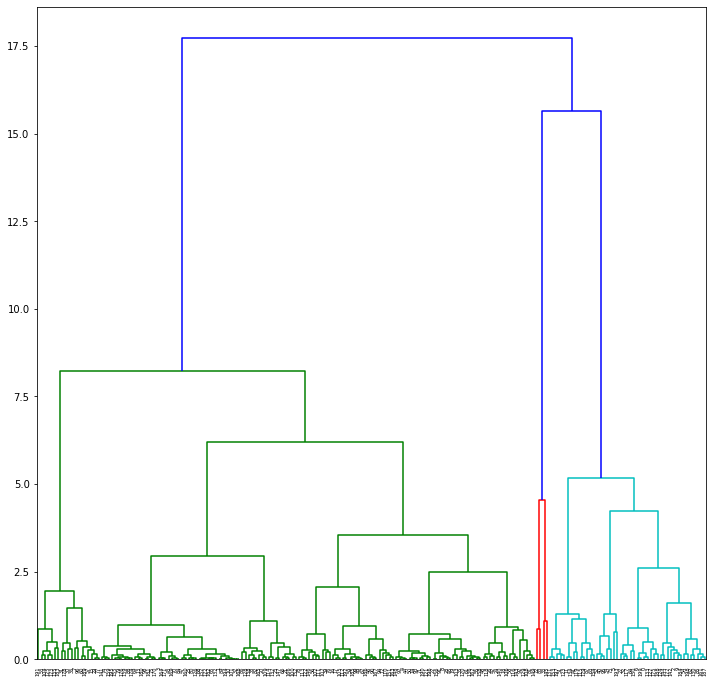

In [126]:
#create dendrogram
plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward', metric='euclidean', optimal_ordering=False))

#create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='ward')

#save clusters for chart
y_hc = hc.fit_predict(data_scaled)

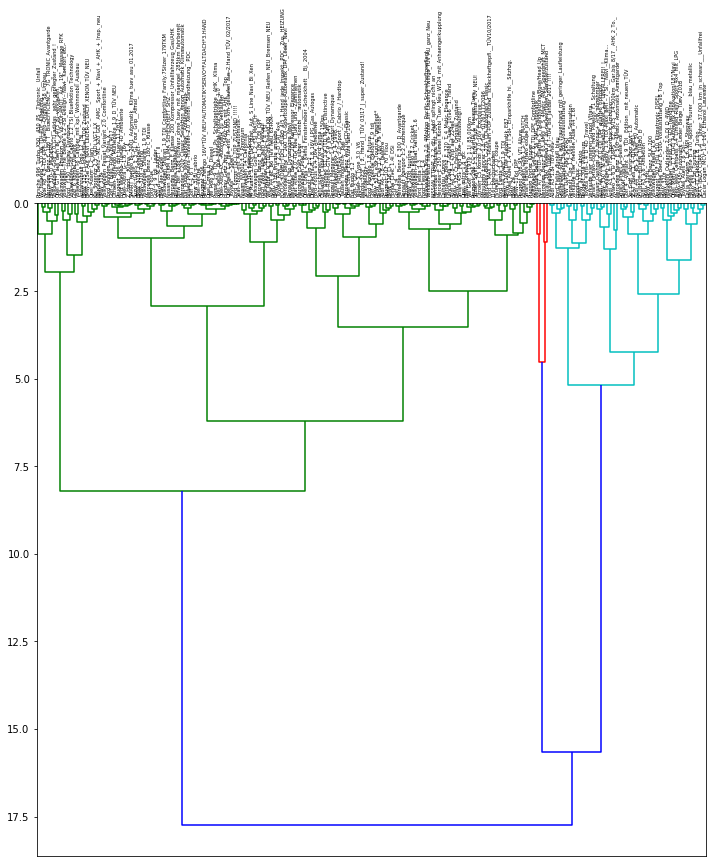

In [127]:
#create dendrogram
plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward', metric='euclidean', optimal_ordering=False), labels=list(X_train.index), orientation='bottom', leaf_rotation=90)

#create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='ward')

#save clusters for chart
y_hc = hc.fit_predict(data_scaled)

In [87]:
cluster_train = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_train.fit_predict(data_scaled)

array([0, 4, 0, 4, 1, 0, 0, 3, 1, 0, 4, 0, 1, 4, 1, 3, 1, 1, 1, 1, 4, 4,
       1, 4, 1, 4, 1, 0, 1, 3, 3, 3, 0, 2, 0, 1, 3, 4, 4, 1, 0, 0, 1, 4,
       1, 1, 1, 4, 1, 1, 1, 0, 0, 3, 0, 1, 1, 3, 1, 1, 3, 1, 0, 0, 0, 4,
       4, 1, 4, 4, 4, 1, 2, 0, 4, 4, 1, 3, 1, 4, 4, 1, 4, 2, 4, 0, 4, 0,
       4, 4, 1, 1, 1, 1, 1, 0, 3, 1, 4, 1, 4, 4, 1, 1, 3, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 4, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 3, 4, 0, 4, 1, 0, 0,
       4, 0, 0, 3, 1, 4, 4, 4, 1, 4, 0, 1, 0, 2, 1, 4, 1, 1, 0, 1, 4, 0,
       0, 4, 1, 4, 1, 4, 4, 0, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 3, 4, 0,
       4, 0, 3, 0, 4, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 1, 0, 4, 4, 1, 0,
       0, 0], dtype=int64)

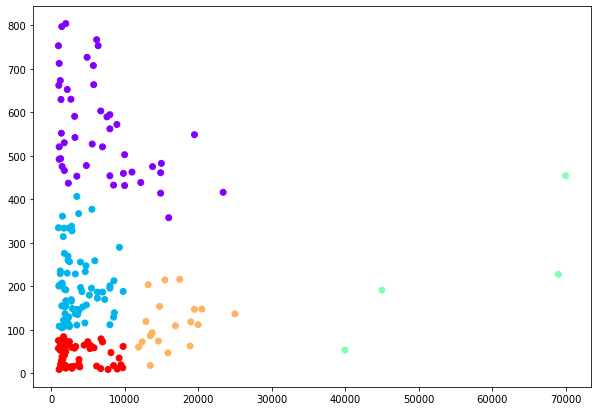

In [88]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train['price'], X_train['duration_hours'], c=cluster_train.labels_, cmap='rainbow')

Berikut ini adalah penerapan model untuk data test-nya.

In [20]:
test = test.set_index('name')

In [21]:
X_test = test.iloc[:200, [3, 19]]
X_test

,price,duration_hours
name,,
Audi_A4_2.0,3900,54.301111
Lada_Niva_4x4,8999,665.749167
BMW_330_E90_M_PERFORMANCE_SCHWARZES_BIEST_!!,15000,620.776667
Nissan_X_Trail_2_2DCI_Comfort_4x4_AHK_Klima_Servo_Alu_Tempomat_NR,8450,60.304167
Renault_Scenic_Edition,2500,542.762222
Kia_Rio_1.4l_/_5Tuerer___Mp3__Navi__NICHTRAUCHER__aus_2ter_Hand!,1400,31.686667
Opel_Vivaro_2.0_CDTI_L2H1,12250,756.297500
BMW_318i_touring_M_Sportpaket_II,4350,64.304444
Mercedes_Benz_C_180_Esprit,1200,13.688056


In [22]:
#standardizing the data
sltd_data2 = X_test
scaler2 = StandardScaler()
data_scaled2 = scaler2.fit_transform(sltd_data2)

#statistics of scaled data
pd.DataFrame(data_scaled2).describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-3.608225e-18,-6.661338e-17
std,1.002509e+00,1.002509e+00
min,-8.297517e-01,-1.204352e+00
25%,-6.431934e-01,-9.108198e-01
50%,-3.223796e-01,-2.397799e-01
75%,2.511875e-01,6.978544e-01
max,5.032179e+00,2.482224e+00


C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


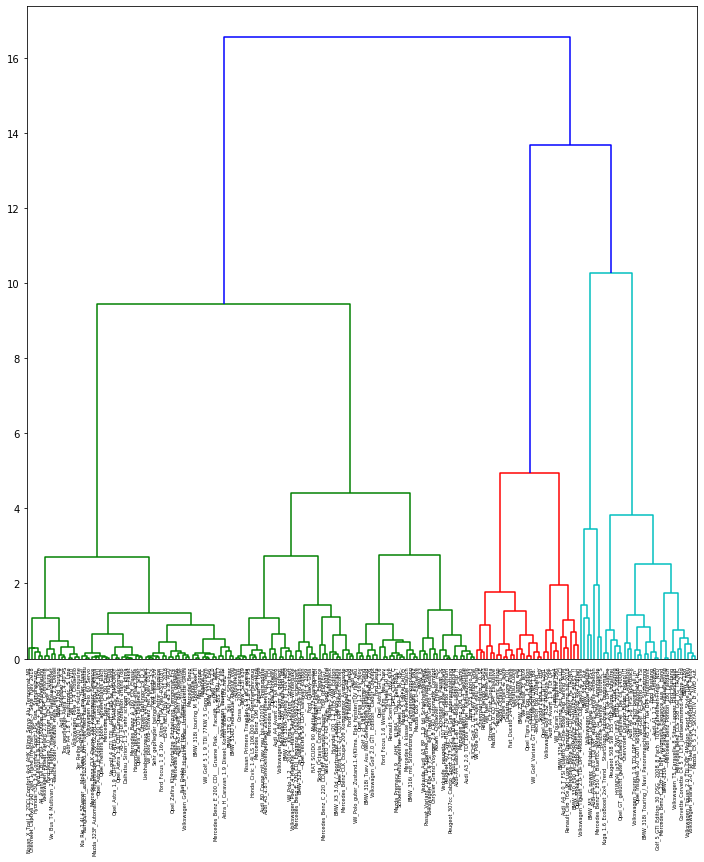

In [125]:
#create dendrogram
plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(data_scaled2, method='ward', metric='euclidean', optimal_ordering=False), labels=list(X_test.index), leaf_rotation=90)

#create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='ward')

#save clusters for chart
y_hc = hc.fit_predict(data_scaled)

In [89]:
cluster_test = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster_test.fit_predict(data_scaled2)

array([1, 2, 2, 1, 5, 1, 2, 1, 1, 3, 0, 1, 1, 8, 1, 9, 3, 6, 1, 9, 9, 1,
       9, 1, 1, 5, 0, 5, 7, 3, 1, 0, 0, 1, 6, 9, 1, 1, 1, 0, 2, 7, 3, 5,
       1, 0, 1, 0, 0, 7, 0, 8, 6, 3, 9, 0, 1, 1, 8, 1, 2, 1, 1, 5, 0, 0,
       9, 1, 1, 0, 0, 9, 1, 1, 5, 1, 1, 0, 3, 9, 0, 1, 2, 1, 1, 1, 1, 1,
       8, 5, 1, 3, 5, 6, 1, 6, 5, 4, 1, 3, 6, 5, 0, 1, 5, 6, 9, 6, 0, 1,
       6, 1, 5, 6, 3, 5, 3, 7, 7, 5, 1, 1, 0, 0, 6, 0, 3, 3, 9, 3, 3, 5,
       1, 0, 5, 1, 9, 6, 2, 1, 9, 3, 1, 9, 6, 0, 0, 2, 6, 0, 3, 3, 1, 4,
       1, 0, 5, 0, 0, 3, 0, 4, 1, 9, 3, 3, 1, 1, 6, 1, 1, 1, 0, 7, 1, 0,
       9, 9, 5, 0, 5, 2, 0, 0, 9, 0, 3, 5, 6, 3, 1, 1, 9, 2, 0, 6, 1, 1,
       1, 2], dtype=int64)

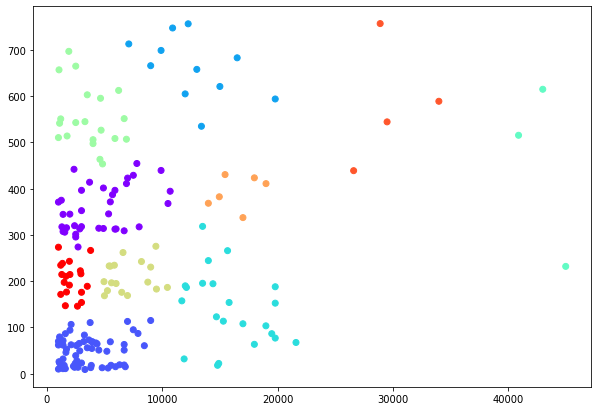

In [90]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test['price'], X_test['duration_hours'], c=cluster_test.labels_, cmap='rainbow')

# Evaluation

<Figure size 1224x864 with 0 Axes>

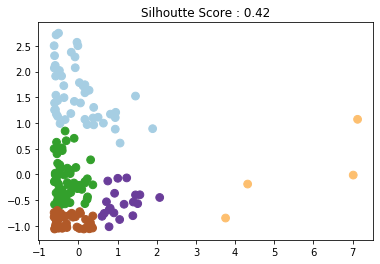

<Figure size 1224x864 with 0 Axes>

In [107]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt 
from sklearn.metrics.cluster import silhouette_score

algs= AgglomerativeClustering(n_clusters=5)
clusters = algs.fit_predict(X_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap="Paired", s=60)
plt.title("Silhoutte Score : %.2f" % (silhouette_score(data_scaled, clusters)))
plt.figure(figsize=(17,12))
#plt.show()

In [136]:
def train_test(classifier, train, train_label, test, test_label):
    """
    Method for evaluation performance of SVM
    train test pipeline
    """
    vectorizer = vectorizerSpacy()
    lb = MultiLabelBinarizer()
    clas = OneVsRestClassifier(classifier)
    pipe = Pipeline([
                     ('vectorizer', vectorizer),
                     ('classifier',clas)])
    y = lb.fit_transform(train_label)
    print(len(y))
    pipe.fit(train, y)
    pred_data = pipe.predict(test)

    print((str(precision_score(lb.transform(test_label), pred_data, average='micro')) + '\n' + str(recall_score(lb.transform(test_label), pred_data, average='micro')) + '\n' +
     str(f1_score(lb.transform(test_label), pred_data, average='macro')) + '\n' + str(f1_score(lb.transform(test_label), pred_data, average='micro')) +
      '\n'  +str(accuracy_score(lb.transform(test_label), pred_data))).replace(".", ","))

    print("F1: " + str(f1_score(lb.transform(test_label), pred_data, average='micro')))
    print("F1_macro: " + str(f1_score(lb.transform(test_label), pred_data, average='macro')))
    print("Recall: " + str(recall_score(lb.transform(test_label), pred_data, average='micro')))
    print("Precision: " + str(precision_score(lb.transform(test_label), pred_data, average='micro')))
    print("Accuracy:" + str(accuracy_score(lb.transform(test_label), pred_data)))

NameError: name 'normalize' is not defined

In [128]:
data_scaled

array([[-5.32328598e-01,  1.12924444e+00],
       [-5.99710614e-01, -1.04581829e+00],
       [ 3.88558959e-01,  9.64021765e-01],
       [-3.97564565e-01, -1.02573755e+00],
       [-5.54789270e-01, -5.77493680e-01],
       [ 1.89331169e+00,  8.89813968e-01],
       [-5.88480278e-01,  1.26074126e+00],
       [ 7.80497687e-01, -1.01670507e+00],
       [-5.71634774e-01, -3.59464312e-01],
       [ 5.00862319e-01,  1.11239880e+00],
       [-5.71634774e-01, -1.01231050e+00],
       [-5.09867925e-01,  2.74716830e+00],
       [-3.63873557e-01, -9.25600299e-03],
       [-4.53716245e-01, -7.54597000e-01],
       [-4.59331413e-01, -5.69836085e-01],
       [ 9.05154417e-01, -7.47307725e-01],
       [-4.87407253e-01, -4.97437835e-04],
       [-5.94095446e-01, -5.29756235e-03],
       [-1.50497172e-01, -2.42393131e-01],
       [-3.41412885e-01, -5.71718904e-01],
       [ 2.76255598e-01, -1.05625092e+00],
       [-1.28036500e-01, -7.97485647e-01],
       [-4.25640405e-01, -2.92617592e-01],
       [ 5.

In [130]:
data_scaled2

array([[-0.44330937, -0.98024097],
       [ 0.23616293,  2.03351119],
       [ 1.03583214,  1.81184727],
       [ 0.16300539, -0.95065265],
       [-0.62986776,  1.42732368],
       [-0.77644935, -1.09170478],
       [ 0.66937816,  2.47981277],
       [-0.38334418, -0.93093577],
       [-0.80310055, -1.18041772],
       [ 0.59608737, -0.47271315],
       [-0.64319336,  0.32809379],
       [-0.63000102, -1.16579675],
       [-0.52326297, -1.20435152],
       [ 2.96804403,  1.43483885],
       [-0.65651896, -1.16936745],
       [-0.76325701, -0.27562106],
       [ 0.90257615, -0.04381051],
       [-0.24342538, -0.10055146],
       [-0.03154836, -0.69212074],
       [-0.73647256, -0.37894812],
       [-0.80323381, -0.0929295 ],
       [-0.74313535, -1.02207892],
       [-0.57656536, -0.15226086],
       [-0.32471154, -1.18564917],
       [-0.22277071, -1.15957542],
       [-0.52326297,  1.43708834],
       [ 0.35622658,  0.9171466 ],
       [-0.35003018,  1.03555602],
       [ 1.02916934,